# Graduate_admissions

### This dataset is created for prediction of Graduate Admissions from an Indian perspective.

In [205]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## First look on data

In [206]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


First is to check if there are any missing values

In [208]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

So there is no missing value

All attributes are in numeric format

There is a attribute called Serial No. . If this attribute is unique then there is no predicting power and should be removed 

In [209]:
len(set(data['Serial No.']))

500

As all values are unique, this column can be removed

In [210]:
data.drop('Serial No.',axis=1,inplace=True)

Next step is to rename attribute name for easier processing 

In [211]:
print(list(data))

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [212]:
data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'Rating','LOR ':'LOR','Chance of Admit ':'Chance'})

In [213]:
data.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Data exploration

IT's time to explore the data 
<br>First is to see if any correlation

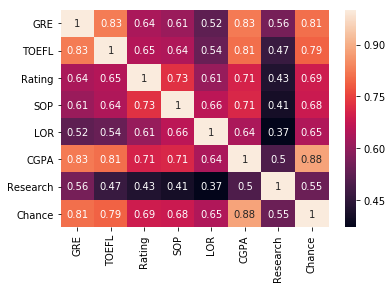

In [214]:
data_corr = data.corr()
sns.heatmap(data_corr,annot=True)

From correlation matrix, GRE, TOEFL and CGPA are highly correlated with Change. However, they themselves are also highly correlated with eath other. Therefore, it is possible to reduce data size for prediction without affecting prediction ability

Then we will have a look on distrubution of all attributes

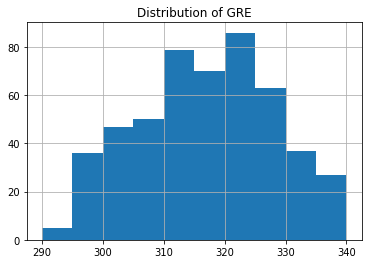

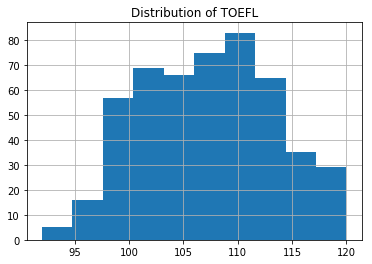

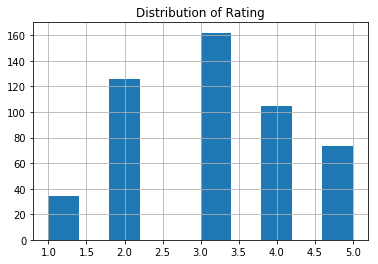

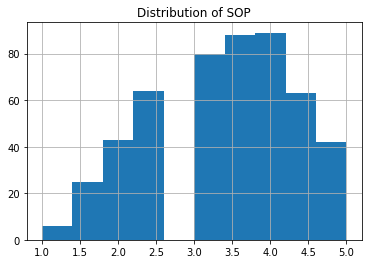

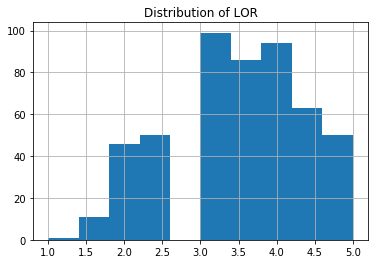

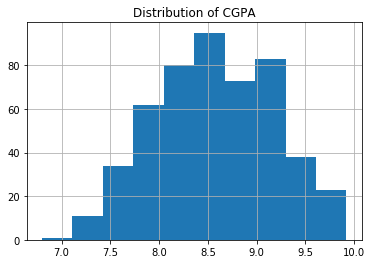

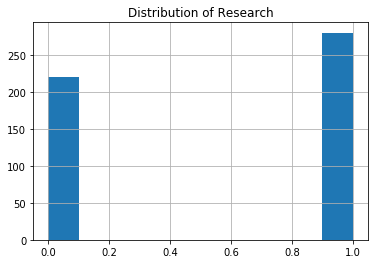

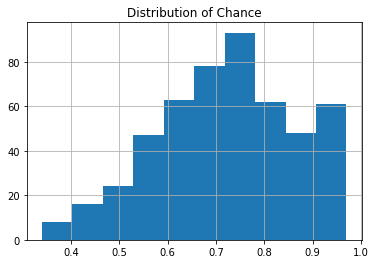

In [215]:
for name in list(data):
    data[name].hist()
    plt.title('Distribution of {}'.format(name))
    plt.show()

For GRE, TOEFL, and CGPA, the distrubutions look like normal distribution.
<br>One particular funding is that the shape of histogram for chance is not in a bell shape.

To better understand the relation between chance of admission and other attributes, scatter plots are performed 

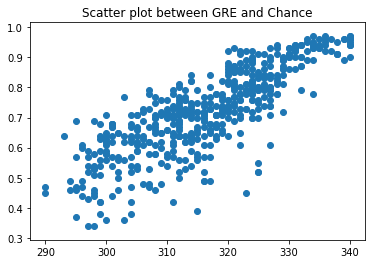

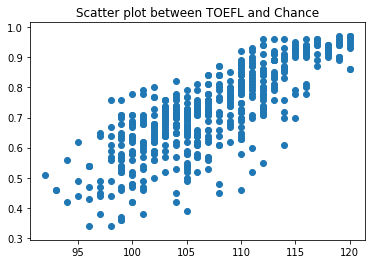

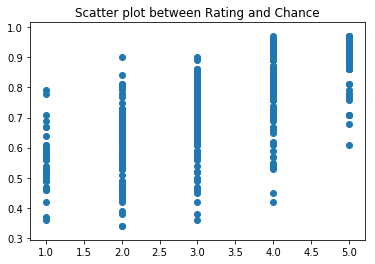

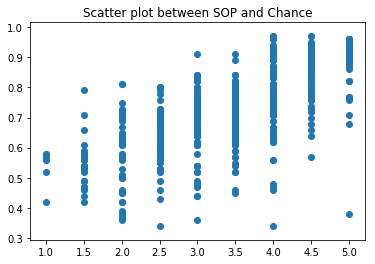

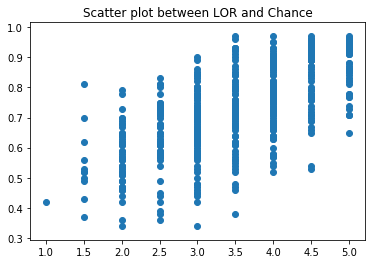

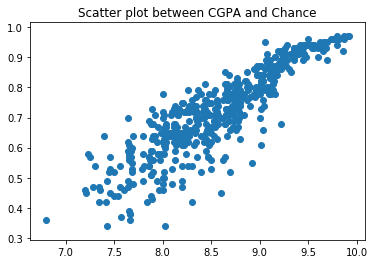

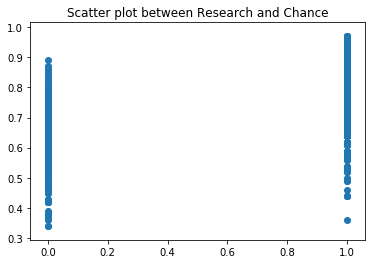

In [216]:
col_name = list(data)
col_name.remove('Chance') 
for name in col_name:
    plt.scatter(data[name],data['Chance'])
    plt.title('Scatter plot between {} and Chance'.format(name))
    plt.show()

Since Research is either 0 or 1, another boxplot is performed for better presentation

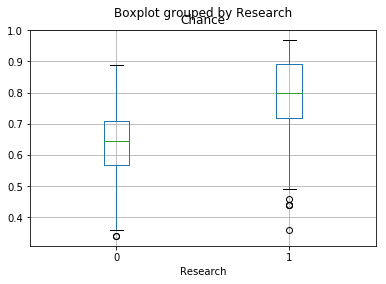

In [217]:
data.boxplot(column='Chance',by='Research')

all independent aattributes are positive correlated with Chance. Same findings as correlation matrix 

## Prediction

Next is to start prediction
<br>First is to separate training data and testing data 

In [218]:
x=data.drop('Chance',axis=1)
y=data['Chance']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

Second is to standardize independent data 

In [219]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

First model is linear regression

In [220]:
reg=LinearRegression().fit(x_train,y_train)

In [221]:
reg.score(x_train,y_train)

0.8210671369321554

In [222]:
reg.coef_

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [223]:
print('R^2 is {}'.format(reg.score(x_test,y_test)))

R^2 is 0.8188432567829628


R square means the percentage of variation explained by the regression model.
<br>So 82% of variation are captured by the model 
<br>Not bad 

Next is to use neural network

In [224]:
def keralmodel():
    model = Sequential()
    model.add(Dense(7,input_dim=7,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(3,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.05),loss='mean_squared_error')
    return model

estimator=KerasRegressor(build_fn=keralmodel, epochs=200 )
estimator.fit(x_train,y_train)

Epoch 1/200
400/400 [==============================] - 0s 510us/step - loss: 0.0176
Epoch 2/200
400/400 [==============================] - 0s 38us/step - loss: 0.0093
Epoch 3/200
400/400 [==============================] - 0s 37us/step - loss: 0.0072
Epoch 4/200
400/400 [==============================] - 0s 38us/step - loss: 0.0065
Epoch 5/200
400/400 [==============================] - 0s 37us/step - loss: 0.0056
Epoch 6/200
400/400 [==============================] - 0s 38us/step - loss: 0.0052
Epoch 7/200
400/400 [==============================] - 0s 38us/step - loss: 0.0060
Epoch 8/200
400/400 [==============================] - 0s 35us/step - loss: 0.0051
Epoch 9/200
400/400 [==============================] - 0s 40us/step - loss: 0.0048
Epoch 10/200
400/400 [==============================] - 0s 37us/step - loss: 0.0052
Epoch 11/200
400/400 [==============================] - 0s 37us/step - loss: 0.0051
Epoch 12/200
400/400 [==============================] - 0s 37us/step - loss: 0.0048


400/400 [==============================] - 0s 35us/step - loss: 0.0038
Epoch 99/200
400/400 [==============================] - 0s 35us/step - loss: 0.0035
Epoch 100/200
400/400 [==============================] - 0s 33us/step - loss: 0.0037
Epoch 101/200
400/400 [==============================] - 0s 35us/step - loss: 0.0039
Epoch 102/200
400/400 [==============================] - 0s 35us/step - loss: 0.0035
Epoch 103/200
400/400 [==============================] - 0s 35us/step - loss: 0.0035
Epoch 104/200
400/400 [==============================] - 0s 35us/step - loss: 0.0037
Epoch 105/200
400/400 [==============================] - 0s 35us/step - loss: 0.0035
Epoch 106/200
400/400 [==============================] - 0s 35us/step - loss: 0.0036
Epoch 107/200
400/400 [==============================] - 0s 35us/step - loss: 0.0037
Epoch 108/200
400/400 [==============================] - 0s 35us/step - loss: 0.0038
Epoch 109/200
400/400 [==============================] - 0s 35us/step - loss: 0.

400/400 [==============================] - 0s 35us/step - loss: 0.0033
Epoch 195/200
400/400 [==============================] - 0s 35us/step - loss: 0.0032
Epoch 196/200
400/400 [==============================] - 0s 35us/step - loss: 0.0034
Epoch 197/200
400/400 [==============================] - 0s 35us/step - loss: 0.0033
Epoch 198/200
400/400 [==============================] - 0s 35us/step - loss: 0.0032
Epoch 199/200
400/400 [==============================] - 0s 35us/step - loss: 0.0032
Epoch 200/200
400/400 [==============================] - 0s 35us/step - loss: 0.0033


In [225]:
y_predict=estimator.predict(x_test)
r2_score(y_test,y_predict)

0.7842812712805725

So 76% of variation are captured by the model <br>
Worse than simple linear regression 

As said before, GPA, TOEFL and CGPA are highly correlated and it is possible to reduce data size without harming prediction
<br>As a result, principal component analysis is carried out 

In [226]:
pca = PCA()

But first need to normalize data

In [227]:
standard=StandardScaler()
data_norm=standard.fit_transform(data)
x=data.drop('Chance',axis=1)
y=data['Chance']
x_norm=standard.fit_transform(x)
x_norm=pd.DataFrame(data=X_norm,columns=x.columns)


In [228]:
pca.fit(x_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [229]:
pca.explained_variance_ratio_.cumsum()

array([0.67519343, 0.78115789, 0.86139044, 0.91572834, 0.95339642,
       0.97886487, 1.        ])

Not suprisingly, four attributes can explain over 90% of variation
<br>As a result, four out of seven will be extracted perform linear regression and neural network again

In [230]:
pca_result=pd.DataFrame(data=pca.components_, columns=x_norm.columns)
pca_result=abs(pca_result[:5])
pca_result_t=pca_result.transpose()


In [231]:
for i in pca_result_t.columns:
    print(pca_result_t[i].nlargest(5))

CGPA      0.421037
GRE       0.403617
TOEFL     0.401203
SOP       0.384662
Rating    0.383413
Name: 0, dtype: float64
Research    0.741821
LOR         0.426027
SOP         0.343434
GRE         0.274523
Rating      0.249775
Name: 1, dtype: float64
Research    0.586154
LOR         0.464501
TOEFL       0.461083
GRE         0.362637
CGPA        0.240737
Name: 2, dtype: float64
LOR       0.648595
Rating    0.641734
SOP       0.326854
GRE       0.144823
CGPA      0.136658
Name: 3, dtype: float64
SOP         0.762766
Rating      0.606980
LOR         0.211117
GRE         0.047792
Research    0.040311
Name: 4, dtype: float64


Top four are CGPA, Research, LOR and SOP
<br>So in the reduced dataset, only these four attributes will remain

In [232]:
data_reduced = data[['CGPA','Research','LOR','SOP','Chance']]

In [233]:
x_reduced=data_reduced.drop('Chance',axis=1)
y_reduced=data_reduced['Chance']
x_reduced_train, x_reduced_test,y_reduced_train, y_reduced_test = train_test_split(x_reduced,y_reduced,test_size = 0.20,random_state = 42)

In [234]:
scaler=StandardScaler()
x_reduced_train=scaler.fit_transform(x_reduced_train)
x_reduced_test=scaler.transform(x_reduced_test)
reg=LinearRegression().fit(x_reduced_train,y_reduced_train)
reg.score(x_reduced_test,y_reduced_test)

0.8258272642105396

Even better than without dimension reduction 

In [236]:
def keralmodel():
    model = Sequential()
    model.add(Dense(4,input_dim=4,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(2,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.05),loss='mean_squared_error')
    return model

estimator=KerasRegressor(build_fn=keralmodel, epochs=200)
estimator.fit(x_reduced_train,y_reduced_train)
y_reduce_predict=estimator.predict(x_reduced_test)
r2_score(y_reduced_test,y_reduce_predict)

Epoch 1/200
400/400 [==============================] - 0s 527us/step - loss: 0.0216
Epoch 2/200
400/400 [==============================] - 0s 35us/step - loss: 0.0124
Epoch 3/200
400/400 [==============================] - 0s 35us/step - loss: 0.0084
Epoch 4/200
400/400 [==============================] - 0s 35us/step - loss: 0.0068
Epoch 5/200
400/400 [==============================] - 0s 35us/step - loss: 0.0060
Epoch 6/200
400/400 [==============================] - 0s 37us/step - loss: 0.0061
Epoch 7/200
400/400 [==============================] - 0s 37us/step - loss: 0.0056
Epoch 8/200
400/400 [==============================] - 0s 35us/step - loss: 0.0054
Epoch 9/200
400/400 [==============================] - 0s 35us/step - loss: 0.0054
Epoch 10/200
400/400 [==============================] - 0s 35us/step - loss: 0.0051
Epoch 11/200
400/400 [==============================] - 0s 37us/step - loss: 0.0054
Epoch 12/200
400/400 [==============================] - 0s 32us/step - loss: 0.0055


400/400 [==============================] - 0s 37us/step - loss: 0.0044
Epoch 99/200
400/400 [==============================] - 0s 35us/step - loss: 0.0044
Epoch 100/200
400/400 [==============================] - 0s 37us/step - loss: 0.0041
Epoch 101/200
400/400 [==============================] - 0s 35us/step - loss: 0.0043
Epoch 102/200
400/400 [==============================] - 0s 35us/step - loss: 0.0043
Epoch 103/200
400/400 [==============================] - 0s 35us/step - loss: 0.0043
Epoch 104/200
400/400 [==============================] - 0s 35us/step - loss: 0.0043
Epoch 105/200
400/400 [==============================] - 0s 37us/step - loss: 0.0044
Epoch 106/200
400/400 [==============================] - 0s 38us/step - loss: 0.0043
Epoch 107/200
400/400 [==============================] - 0s 38us/step - loss: 0.0041
Epoch 108/200
400/400 [==============================] - 0s 38us/step - loss: 0.0041
Epoch 109/200
400/400 [==============================] - 0s 37us/step - loss: 0.

400/400 [==============================] - 0s 38us/step - loss: 0.0042
Epoch 195/200
400/400 [==============================] - 0s 35us/step - loss: 0.0042
Epoch 196/200
400/400 [==============================] - 0s 37us/step - loss: 0.0039
Epoch 197/200
400/400 [==============================] - 0s 35us/step - loss: 0.0042
Epoch 198/200
400/400 [==============================] - 0s 40us/step - loss: 0.0041
Epoch 199/200
400/400 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 200/200
400/400 [==============================] - 0s 35us/step - loss: 0.0044


0.7193539991527353

R square from neural network is reduced by 6% to 72%